In [179]:
import numpy as np
import numpy
import torch, torchvision
from torch import nn, optim
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import seaborn as sns
from sklearn.decomposition import PCA
from umap import UMAP
from package.umap.umap.parametric_umap import ParametricUMAP
import pickle
from sklearn import preprocessing
from umap.parametric_umap import load_ParametricUMAP
import os
import matplotlib
import joblib

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[2],'GPU')

# load fresh MNIST
mnist_train = torchvision.datasets.MNIST(root='./',
                                         train=True,
                                         download=True, 
                                         transform=None)
                                        #  transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),]))
x_train, y_train = mnist_train.data.float().numpy(), mnist_train.targets

mnist_test = torchvision.datasets.MNIST(root='./',
                                        train=False,
                                        download=True, 
                                        transform=None)
                                        # transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),]))
x_test, y_test = mnist_test.data.float().numpy(), mnist_test.targets
x_train2d = x_train.reshape((x_train.shape[0], -1))/255.
x_test2d = x_test.reshape((x_test.shape[0], -1))/255.

x2d = np.concatenate([x_train2d, x_test2d], axis=0)
y2d = np.concatenate([y_train, y_test], axis=0)

True
NVIDIA GeForce RTX 2080 Ti


In [180]:
# # load embedding MNIST
# recon_embed_00_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 0, 0, 0, 10, 19]final_.sav', 'rb')))
# recon_embed_10_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 1, 0, 0, 10, 19]final_.sav', 'rb')))
# recon_embed_01_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 0, 1, 0, 10, 19]final_.sav', 'rb')))
# recon_embed_11_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 1, 1, 0, 10, 19]final_.sav', 'rb')))

# # load reconstructed MNIST final
# recon_train_00_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 0, 0, 0, 10, 19]final_reconstructions.sav', 'rb')))
# recon_train_10_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 1, 0, 0, 10, 19]final_reconstructions.sav', 'rb')))
# recon_train_01_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 0, 1, 0, 10, 19]final_reconstructions.sav', 'rb')))
# recon_train_11_f = pickle.load((open('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 1, 1, 0, 10, 19]final_reconstructions.sav', 'rb')))

# # Recon MSE final
# train_mse_00_f = ((x_train2d-recon_train_00_f[:60000])**2).mean(axis=1)
# train_mse_10_f = ((x_train2d-recon_train_10_f[:60000])**2).mean(axis=1)
# train_mse_01_f = ((x_train2d-recon_train_01_f[:60000])**2).mean(axis=1)
# train_mse_11_f = ((x_train2d-recon_train_11_f[:60000])**2).mean(axis=1)

# loss_history_00 = np.genfromtxt('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 0, 0, 0, 10, 19]history.csv', delimiter=',')
# loss_history_10 = np.genfromtxt('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 1, 0, 0, 10, 19]history.csv', delimiter=',')
# loss_history_01 = np.genfromtxt('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 0, 1, 0, 10, 19]history.csv', delimiter=',')
# loss_history_11 = np.genfromtxt('./double_train_weight_umap4/10_19/umap_AE_run_0_[2, 1, 1, 0, 10, 19]history.csv', delimiter=',')

In [181]:
# load embedding MNIST
recon_embed_00_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 0, 0, 0, 1, 28]final_.sav', 'rb')))
recon_embed_10_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 1, 0, 0, 1, 28]final_.sav', 'rb')))
recon_embed_01_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 0, 1, 0, 1, 28]final_.sav', 'rb')))
recon_embed_11_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 1, 1, 0, 1, 28]final_.sav', 'rb')))

# load reconstructed MNIST final
recon_train_00_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 0, 0, 0, 1, 28]final_reconstructions.sav', 'rb')))
recon_train_10_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 1, 0, 0, 1, 28]final_reconstructions.sav', 'rb')))
recon_train_01_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 0, 1, 0, 1, 28]final_reconstructions.sav', 'rb')))
recon_train_11_f = pickle.load((open('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 1, 1, 0, 1, 28]final_reconstructions.sav', 'rb')))

# Recon MSE final
train_mse_00_f = ((x_train2d-recon_train_00_f[:60000])**2).mean(axis=1)
train_mse_10_f = ((x_train2d-recon_train_10_f[:60000])**2).mean(axis=1)
train_mse_01_f = ((x_train2d-recon_train_01_f[:60000])**2).mean(axis=1)
train_mse_11_f = ((x_train2d-recon_train_11_f[:60000])**2).mean(axis=1)

loss_history_00 = np.genfromtxt('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 0, 0, 0, 1, 28]history.csv', delimiter=',')
loss_history_10 = np.genfromtxt('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 1, 0, 0, 1, 28]history.csv', delimiter=',')
loss_history_01 = np.genfromtxt('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 0, 1, 0, 1, 28]history.csv', delimiter=',')
loss_history_11 = np.genfromtxt('./double_train_weight_umap1/1_28/umap_AE_run_0_[2, 1, 1, 0, 1, 28]history.csv', delimiter=',')

In [182]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# scatter plots
def get_scale(embd, max_length=0.5):
    # returns the smallest power of 10 that is smaller than max_length * the
    # spread in the x direction
    spreads = embd.max(0) - embd.min(0)
    spread = spreads.max()

    return 10 ** (int(np.log10(spread * max_length)))

def add_scale(ax, embd):
    """
    Adds a scale bar
    """
    scale = get_scale(embd)
    embd_w, embd_h = embd.max(0)- embd.min(0)
    height =  0.001 * embd_h

    scalebar = AnchoredSizeBar(ax.transData,
                               scale,
                               str(scale),
                               loc="lower center",
                               size_vertical=height,
                               sep=4,
                               frameon=False,
                               fontproperties={"size": 20})
    ax.add_artist(scalebar)
    return scalebar

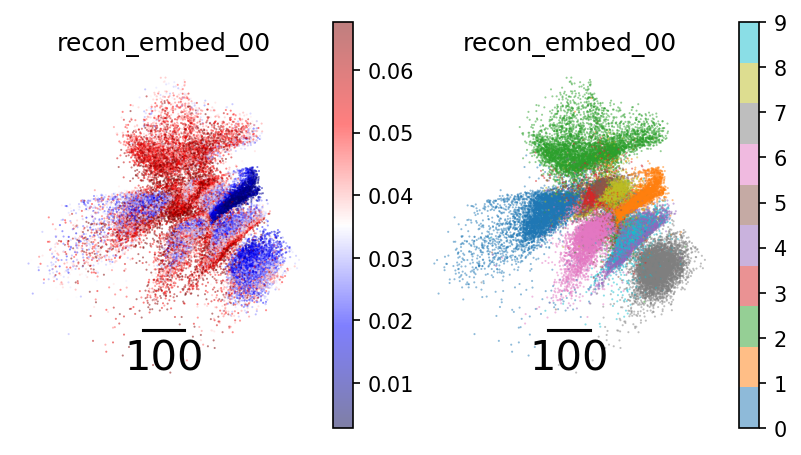

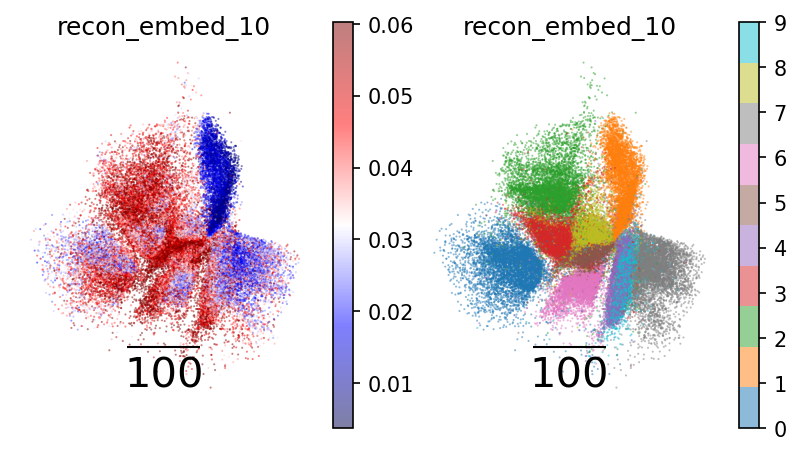

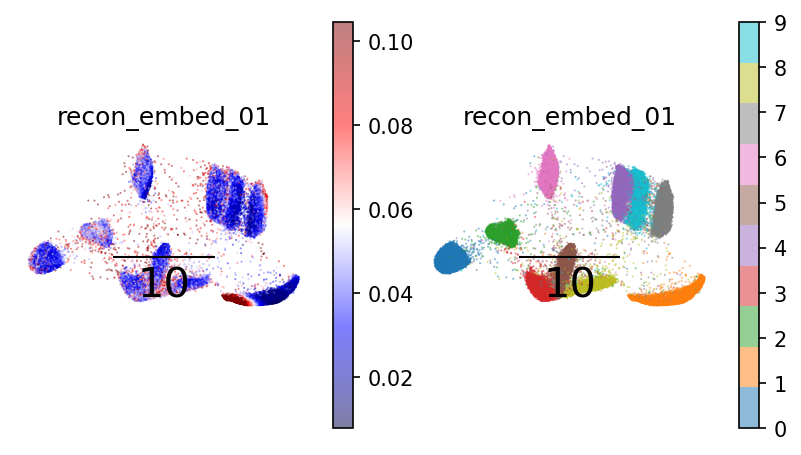

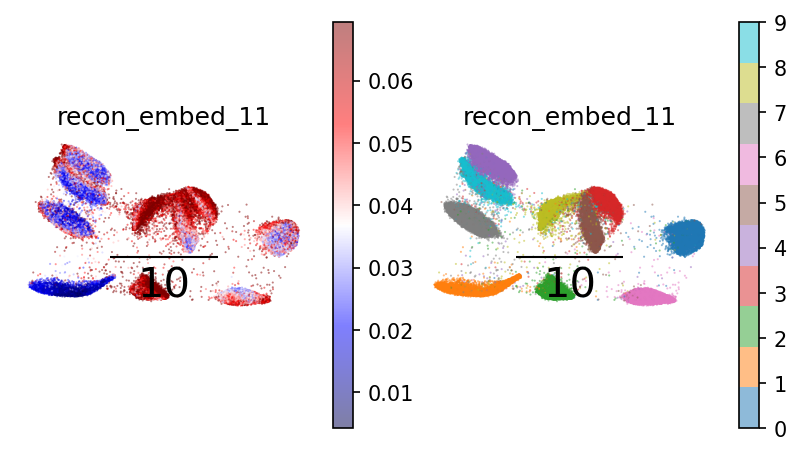

In [183]:
def plot_both(embedding,mse,y_train,title):
    fig,ax = plt.subplots(1,2,dpi=150)
    s = ax[0].scatter(*embedding.T, c=mse, alpha=0.5, s=1.0, cmap="seismic",vmax=max(mse)/3,edgecolor="none")
    add_scale(ax[0],embedding)
    fig.colorbar(s,ax=ax[0],fraction=0.06, pad=0.06)
    t = ax[1].scatter(*embedding.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10",edgecolor="none")
    add_scale(ax[1],embedding)
    fig.colorbar(t,ax=ax[1],fraction=0.06, pad=0.06)
    [axi.set_aspect("equal") for axi in ax.ravel()]
    [axi.set_axis_off() for axi in ax.ravel()]
    [axi.set_title(title) for axi in ax.ravel()]
    plt.show()
    return

plot_both(recon_embed_00_f,train_mse_00_f,y_train,'recon_embed_00')
plot_both(recon_embed_10_f,train_mse_10_f,y_train,'recon_embed_10')
plot_both(recon_embed_01_f,train_mse_01_f,y_train,'recon_embed_01')
plot_both(recon_embed_11_f,train_mse_11_f,y_train,'recon_embed_11')

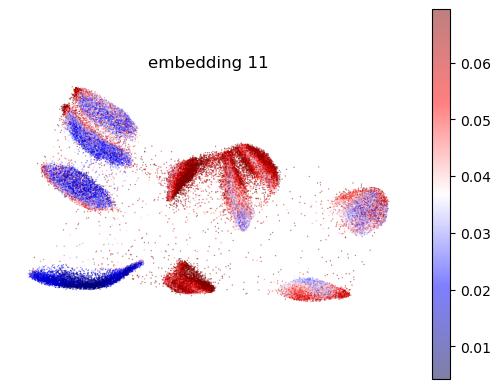

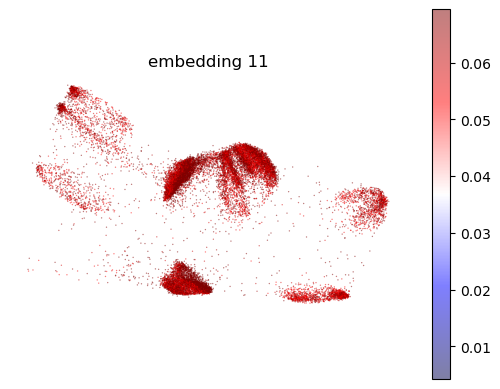

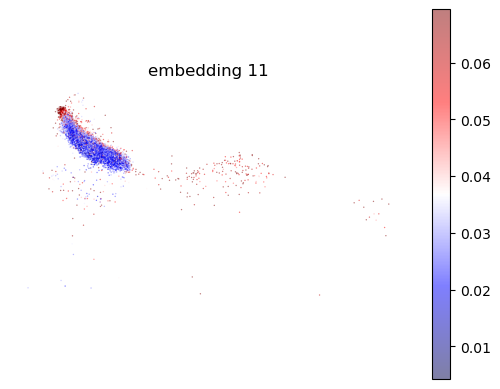

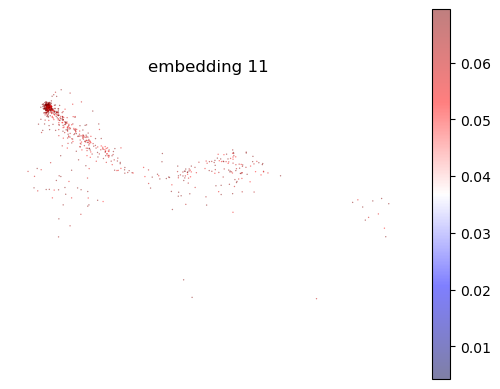

In [184]:
index_1 = np.where((y_train==1))
index_2 = np.where((y_train==2))
index_3 = np.where((y_train==3))
index_4 = np.where((y_train==4))
index_5 = np.where((y_train==5))
index_6 = np.where((y_train==6))
index_7 = np.where((y_train==7))
index_8 = np.where((y_train==8))
index_9 = np.where((y_train==9))
index_0 = np.where((y_train==0))

ind = index_9
recon = recon_embed_11_f
train = recon_train_11_f
mse = train_mse_11_f
title = 'embedding 11'

cut_off = np.where(mse>max(mse)/4)
similar = np.intersect1d(ind,cut_off)

plt.scatter(*recon.T, c=mse, alpha=0.5, s=1.0, cmap="seismic",
            vmax=max(mse)/3,vmin=min(mse),edgecolor="none")
plt.colorbar()
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(title)
plt.show()

plt.scatter(*recon[cut_off].T, c=mse[cut_off], alpha=0.5, s=1.0, cmap="seismic",
           vmax=max(mse)/3,vmin=min(mse),edgecolor="none")
plt.colorbar()
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(title)
plt.show()

plt.scatter(*recon[ind].T, c=mse[ind], alpha=0.5, s=1.0, cmap="seismic",
            vmax=max(mse)/3,vmin=min(mse),edgecolor="none")
plt.colorbar()
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(title)
plt.show()

plt.scatter(*recon[similar].T, c=mse[similar], alpha=0.5, s=1.0, cmap="seismic",
            vmax=max(mse)/3,vmin=min(mse),edgecolor="none")
plt.colorbar()
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(title)
plt.show()

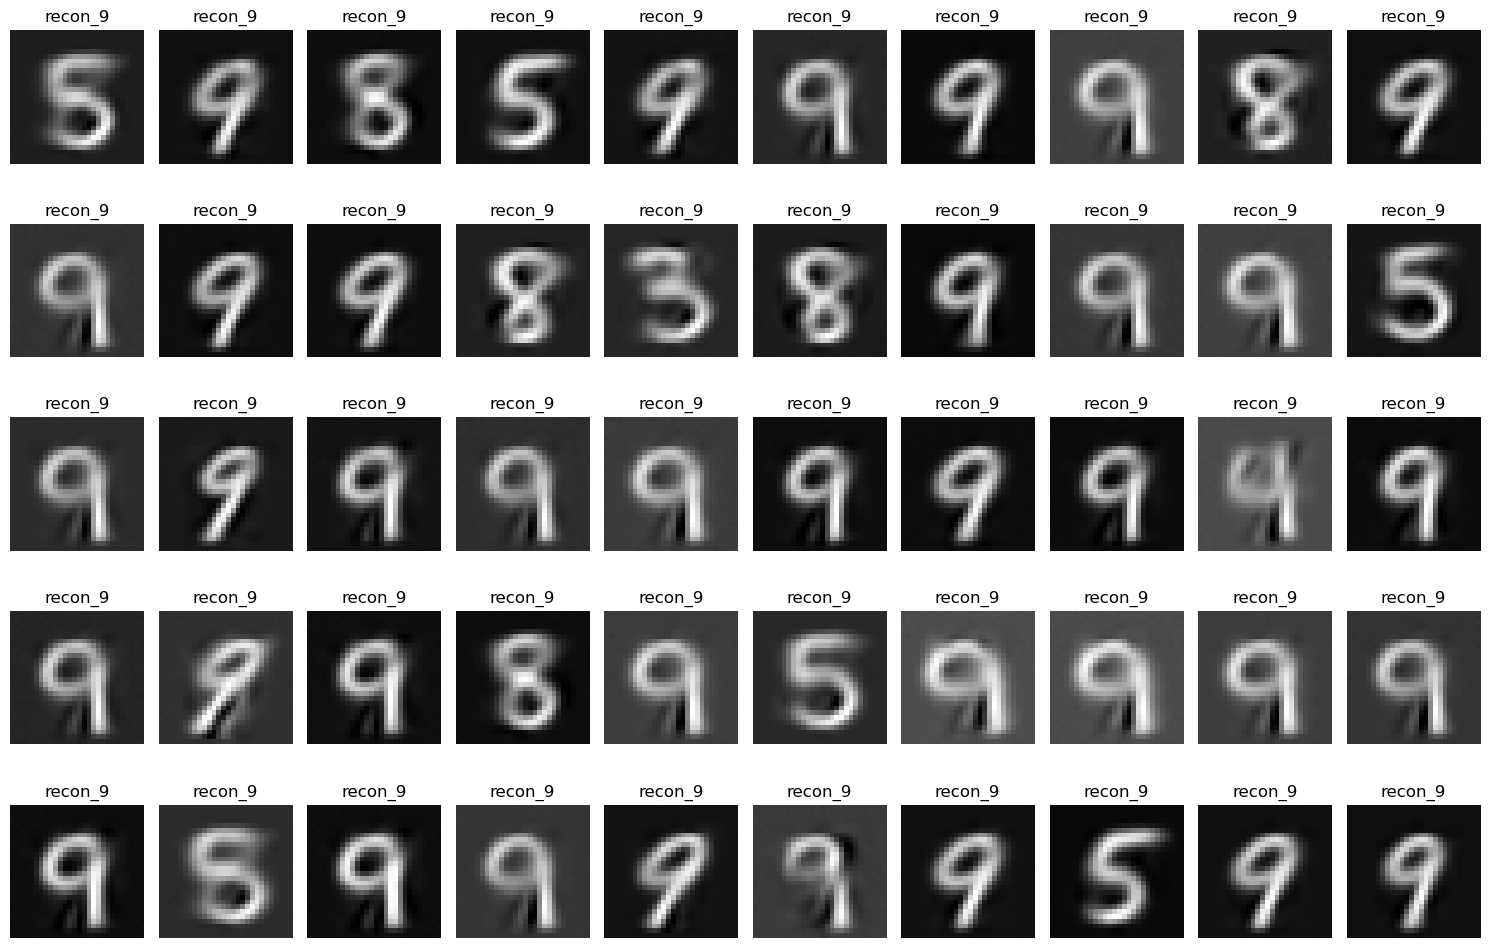

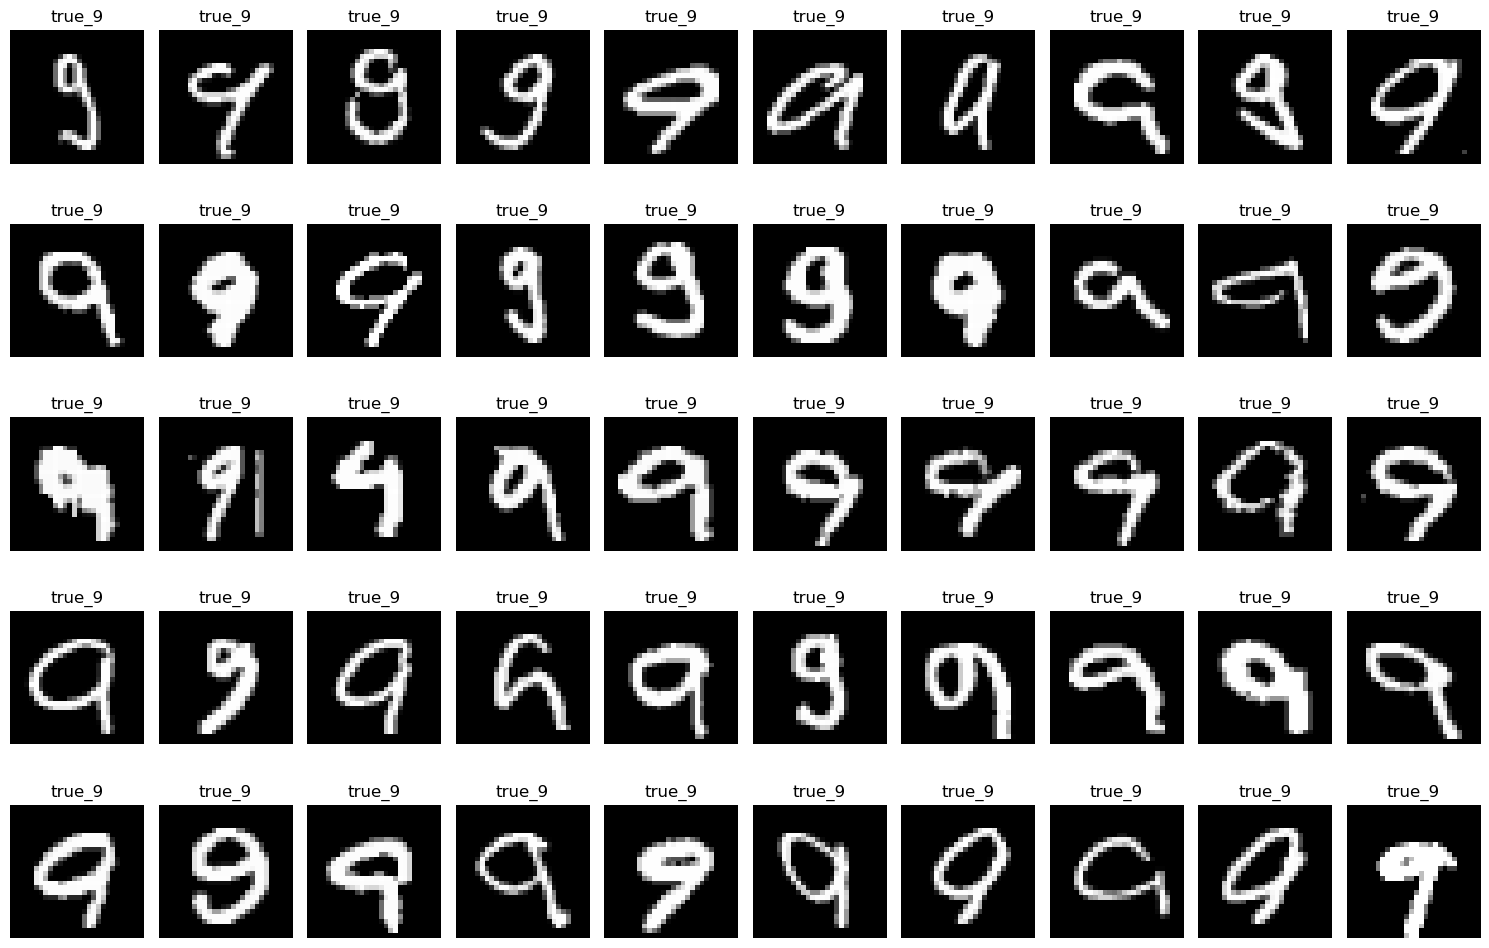

In [185]:
recon1 = train[similar]
true1 = x2d[similar]
num_row = 5
num_col = 10
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(50):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(recon1[i].reshape(28,28), cmap='gray')
    ax.set_title('recon_'+str(y2d[similar][i]))
    ax.set_axis_off()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(50):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(true1[i].reshape(28,28), cmap='gray')
    ax.set_title('true_'+str(y2d[similar][i]))
    ax.set_axis_off()
plt.tight_layout()
plt.show()

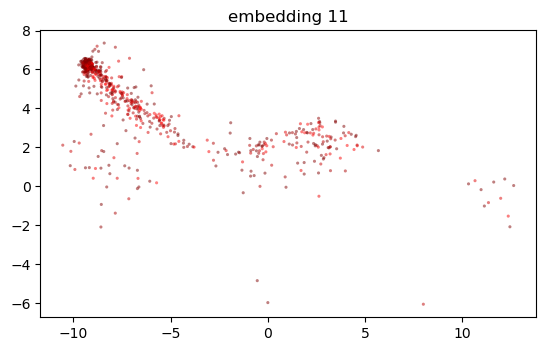

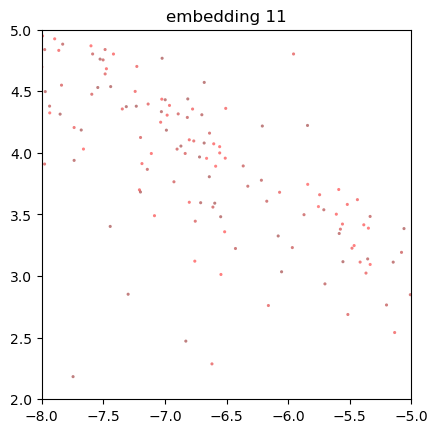

In [194]:
f, ax = plt.subplots()
scat = ax.scatter(*recon[similar].T, c=mse[similar], alpha=0.5, s=5.0, cmap="seismic",
            vmax=max(mse)/3,vmin=min(mse),edgecolor="none")
plt.gca().set_aspect("equal")
plt.title(title)
plt.show()

f, ax = plt.subplots()
scat = ax.scatter(*recon[similar].T, c=mse[similar], alpha=0.5, s=5.0, cmap="seismic",
            vmax=max(mse)/3,vmin=min(mse),edgecolor="none")
plt.xlim(-8,-5)
plt.ylim(2,5)
plt.gca().set_aspect("equal")
plt.title(title)
plt.show()

In [195]:
window_x = np.where(recon[similar].T[0]< -5.0) and np.where(recon[similar].T[0]> -8)
window_y = np.where(recon[similar].T[1]< 5.0) and np.where(recon[similar].T[1]> 2.0)
new_window = np.intersect1d(window_x,window_y)
new_points = recon[similar][new_window]

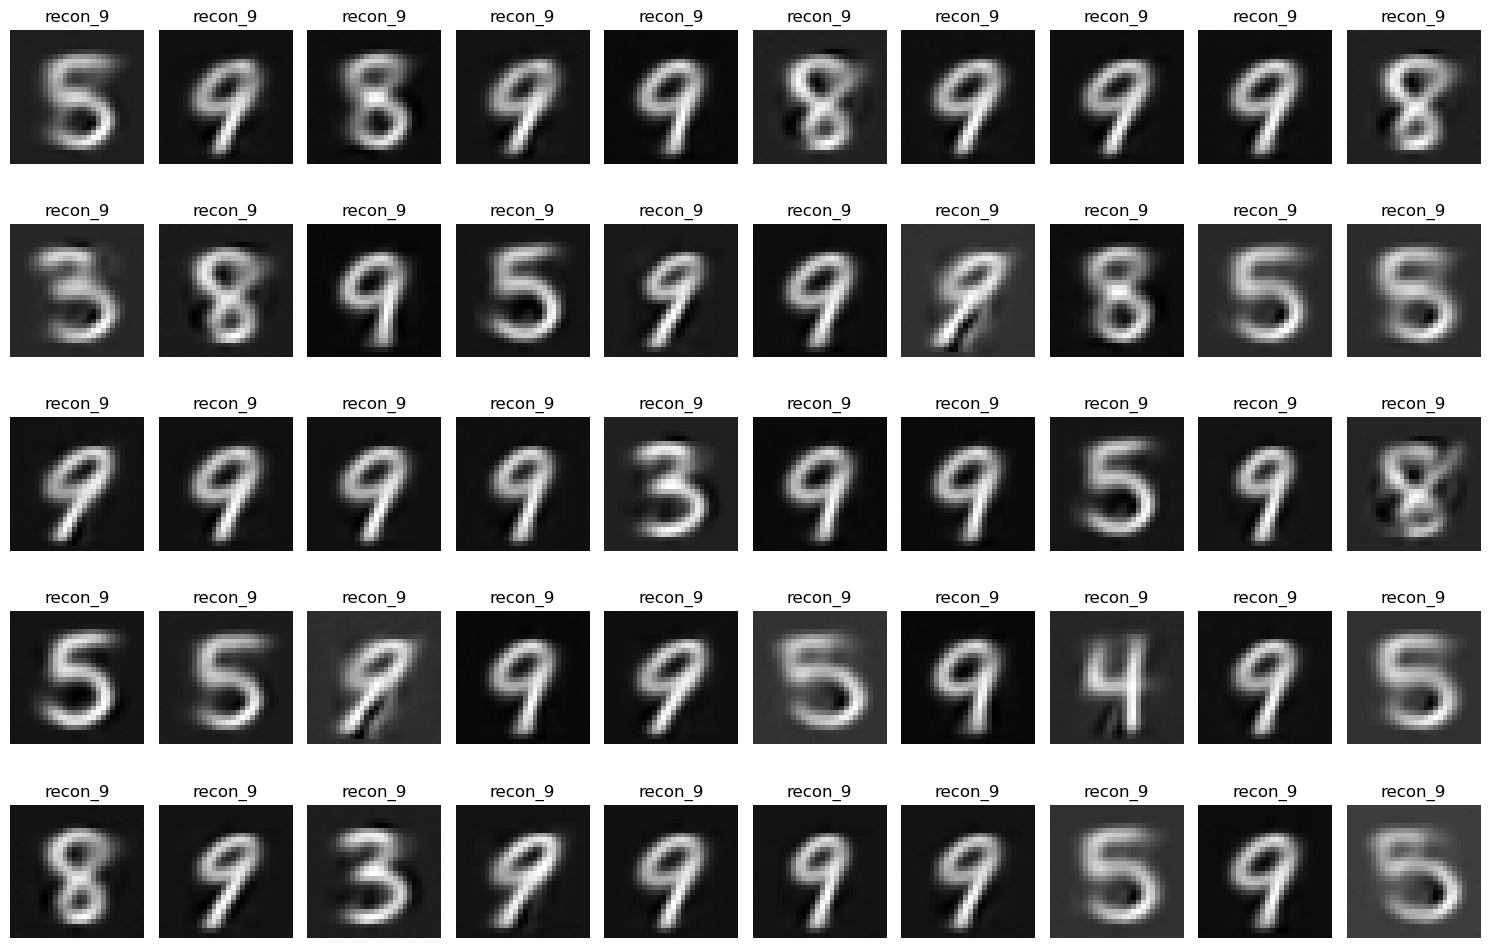

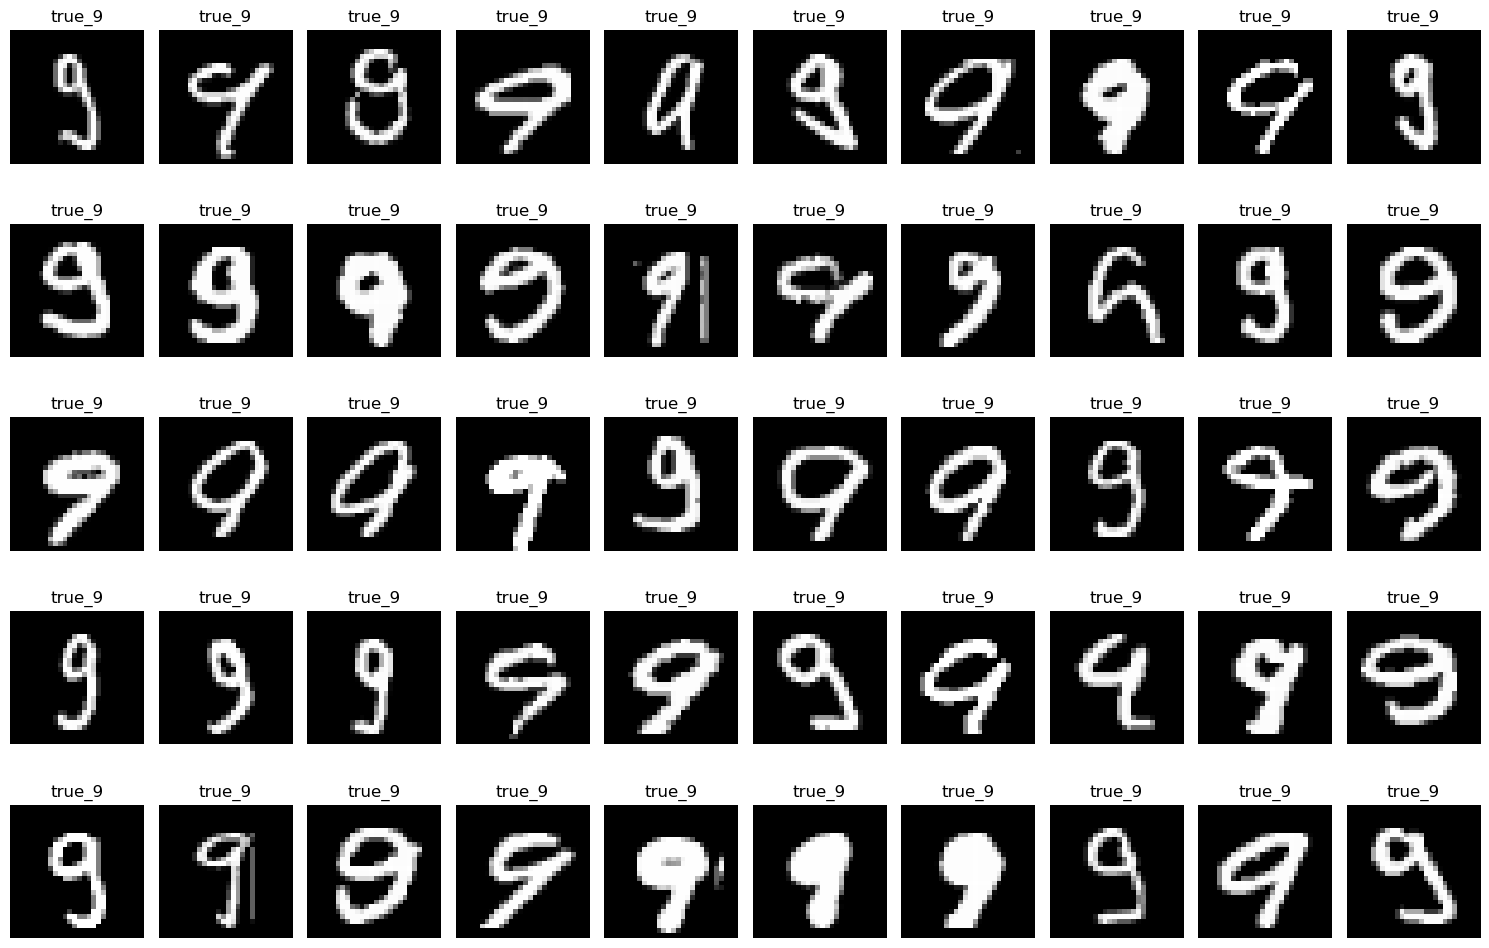

In [196]:
recon1 = train[similar][new_window]
true1 = x2d[similar][new_window]
num_row = 5
num_col = 10
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(50):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(recon1[i].reshape(28,28), cmap='gray')
    ax.set_title('recon_'+str(y2d[similar][i]))
    ax.set_axis_off()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(50):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(true1[i].reshape(28,28), cmap='gray')
    ax.set_title('true_'+str(y2d[similar][i]))
    ax.set_axis_off()
plt.tight_layout()
plt.show()

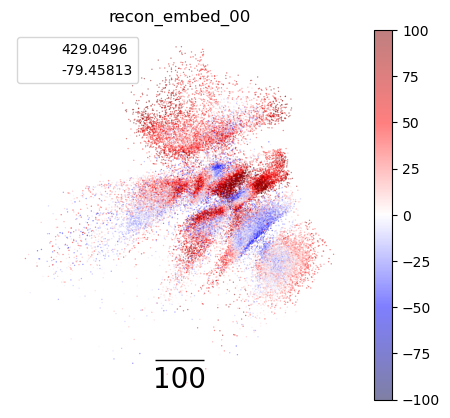

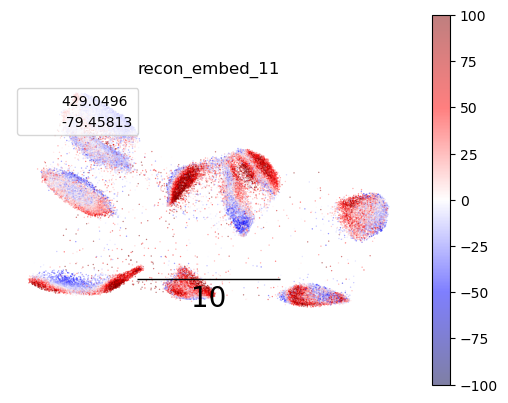

In [198]:
mse_diff_f = (train_mse_11_f - train_mse_00_f)/np.abs(train_mse_00_f) * 100

fig,ax = plt.subplots(dpi=100)
s = ax.scatter(*recon_embed_00_f.T, c=mse_diff_f, alpha=0.5, s=1.0, cmap="seismic",vmin=-100,vmax=100,edgecolor="none")
add_scale(ax,recon_embed_00_f)
fig.colorbar(s)
plt.plot([], [], ' ', label=max(mse_diff_f))
plt.plot([], [], ' ', label=min(mse_diff_f))
plt.legend(loc=2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title('recon_embed_00')
plt.show()

fig,ax = plt.subplots(dpi=100)
s = ax.scatter(*recon_embed_11_f.T, c=mse_diff_f, alpha=0.5, s=1.0, cmap="seismic",vmin=-100,vmax=100,edgecolor="none")
add_scale(ax,recon_embed_11_f)
fig.colorbar(s)
plt.plot([], [], ' ', label=max(mse_diff_f))
plt.plot([], [], ' ', label=min(mse_diff_f))
plt.legend(loc=2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title('recon_embed_11')
plt.show()